In [19]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# First read in the unvalidated GALAH DR4 file
galah_dr4_raw = Table.read('../spectrum_post_processing/galah_dr4_allstar_not_validated.fits')
galah_dr4_raw['source_id'] = galah_dr4_raw['gaiadr3_source_id']

In [21]:
open_cluster_list = Table.read('../auxiliary_information/CantatGaudin_2020_AandA_640_1.fits')
open_cluster_list['source_id'] = open_cluster_list['GaiaDR2']

In [22]:
# Join them with the tmass_id keyword
joined = join(galah_dr4_raw, open_cluster_list, keys='source_id')

In [23]:
unflagged = (joined['flag_sp'] == 0)
flagged = (joined['flag_sp'] == 1)

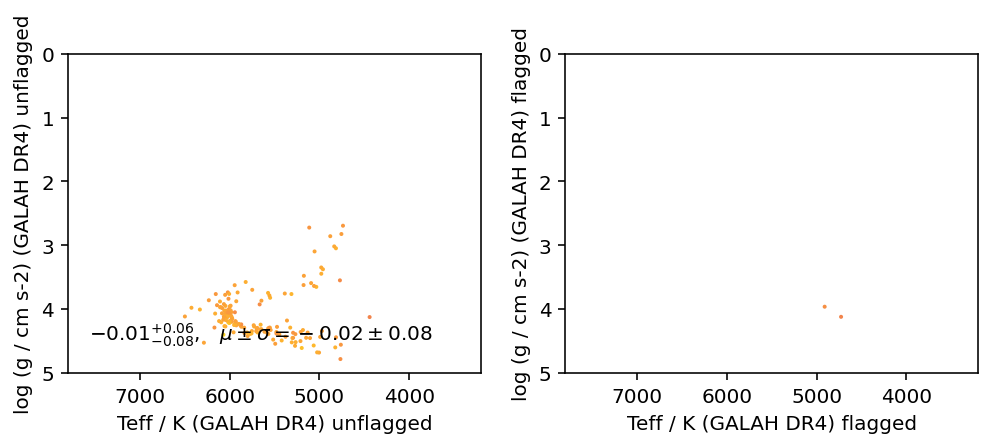

In [24]:
f, gs = plt.subplots(1,2,figsize=(7,3))

# First panel: GALAH DR4 unflagged
ax = gs[0]
ax.set_xlabel('Teff / K (GALAH DR4) unflagged')
ax.set_ylabel('log (g / cm s-2) (GALAH DR4) unflagged')
ax.scatter(
    joined['teff'][unflagged],
    joined['logg'][unflagged],
    c = joined['fe_h'][unflagged],
    s=1,cmap='plasma',vmin=-2,vmax=0.5
)
ax.set_xlim(7800,3200)
ax.set_ylim(5,0)

element_detection = (
    unflagged & 
    (joined['flag_fe_h'] == 0)
)
percentiles = np.percentile(joined['fe_h'][element_detection],q=[16,50,84])
mean = np.mean(joined['fe_h'][element_detection])
sigma = np.std(joined['fe_h'][element_detection])
text = r'${'+str(np.round(percentiles[1],decimals=2))+'}_{-'+str(np.round(percentiles[1]-percentiles[0],decimals=2))+'}^{+'+str(np.round(percentiles[2]-percentiles[1],decimals=2))+'}$,   $\mu\pm\sigma = '+str(np.round(mean,decimals=2))+'\pm'+str(np.round(sigma,decimals=2))+'$'
ax.text(0.05,0.1,text,transform=ax.transAxes)

# Second panel: GALAH DR4 flagged
ax = gs[1]
ax.set_xlabel('Teff / K (GALAH DR4) flagged')
ax.set_ylabel('log (g / cm s-2) (GALAH DR4) flagged')
ax.scatter(
    joined['teff'][flagged],
    joined['logg'][flagged],
    c = joined['fe_h'][flagged],
    s=1,cmap='plasma',vmin=-2,vmax=0.5
)
ax.set_xlim(7800,3200)
ax.set_ylim(5,0)
plt.tight_layout()

(4.7, 2.5)

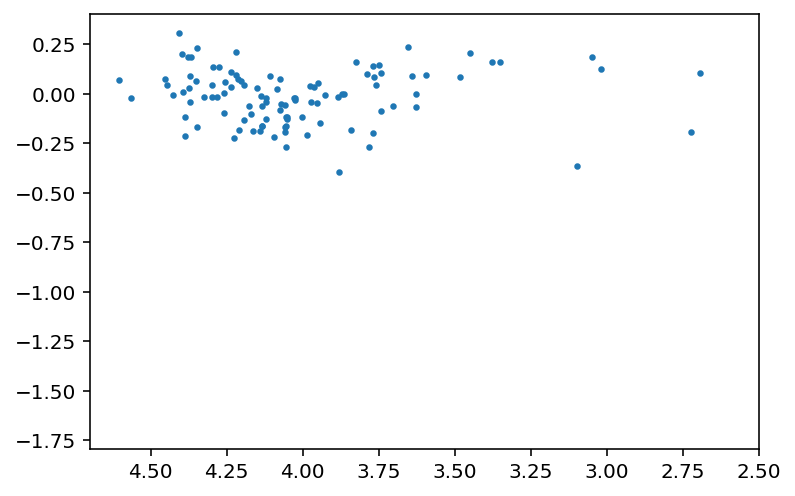

In [16]:
element = 'Al'
element_detection = (
    unflagged & 
    (joined['flag_fe_h'] == 0) & 
    (joined['flag_'+element.lower()+'_fe'] == 0)
)
plt.scatter(
    joined['logg'][element_detection],
    joined[element.lower()+'_fe'][element_detection] + joined['fe_h'][element_detection],
    s=5
)
plt.xlim(4.7,2.5)

In [17]:
def plot_comparison_xfe(joined, element = 'C', name_literature = 'GALAH DR3'):
    f, gs = plt.subplots(1,2,figsize=(7,3),sharex=True,sharey=True)
    
    element_detection = (
        unflagged & 
        (joined['flag_fe_h'] == 0) & 
        (joined['flag_'+element.lower()+'_fe'] == 0)
    )
    element_upper_limit = (
        unflagged & 
        (joined['flag_fe_h'] == 0) & 
        (joined['flag_'+element.lower()+'_fe'] == 1)
    )
    
    # First panel: GALAH DR4 [Fe/H] vs. [X/Fe]
    ax = gs[0]
    ax.set_xlabel('[Fe/H] (GALAH DR4)')
    ax.set_ylabel('['+element+'/Fe] (GALAH DR4) Detection')
    if len(joined['fe_h'][element_detection]) > 5:
        ax.scatter(
            joined['fe_h'][element_detection],
            joined[element.lower()+'_fe'][element_detection],
            s=1
        )

        percentiles = np.percentile(joined[element.lower()+'_fe'][element_detection],q=[16,50,84])
        mean = np.mean(joined[element.lower()+'_fe'][element_detection])
        sigma = np.std(joined[element.lower()+'_fe'][element_detection])
        text = r'${'+str(np.round(percentiles[1],decimals=2))+'}_{-'+str(np.round(percentiles[1]-percentiles[0],decimals=2))+'}^{+'+str(np.round(percentiles[2]-percentiles[1],decimals=2))+'}$,   $\mu\pm\sigma = '+str(np.round(mean,decimals=2))+'\pm'+str(np.round(sigma,decimals=2))+'$'
        ax.text(0.05,0.1,text,transform=ax.transAxes)

    # First panel: GALAH DR4 [Fe/H] vs. [X/Fe]
    ax = gs[1]
    ax.set_xlabel('[Fe/H] (GALAH DR4)')
    ax.set_ylabel('['+element+'/Fe] (GALAH DR4) Upper Limit')
    if len(joined['fe_h'][element_upper_limit]) > 5:
        ax.scatter(
            joined['fe_h'][element_upper_limit],
            joined[element.lower()+'_fe'][element_upper_limit],
            s=1
        )
    
    plt.tight_layout()
    plt.show()
    plt.close()

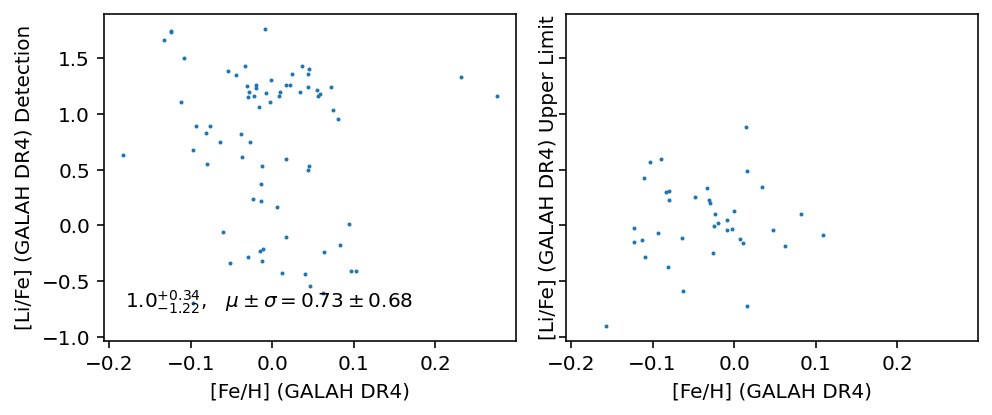

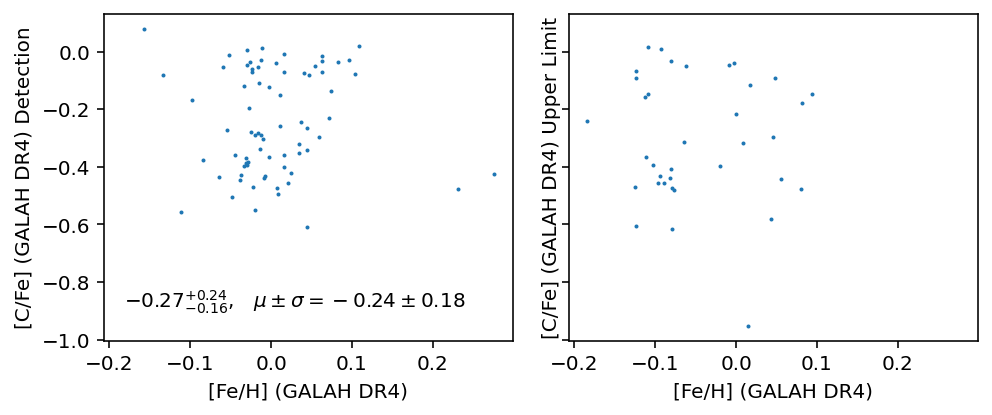

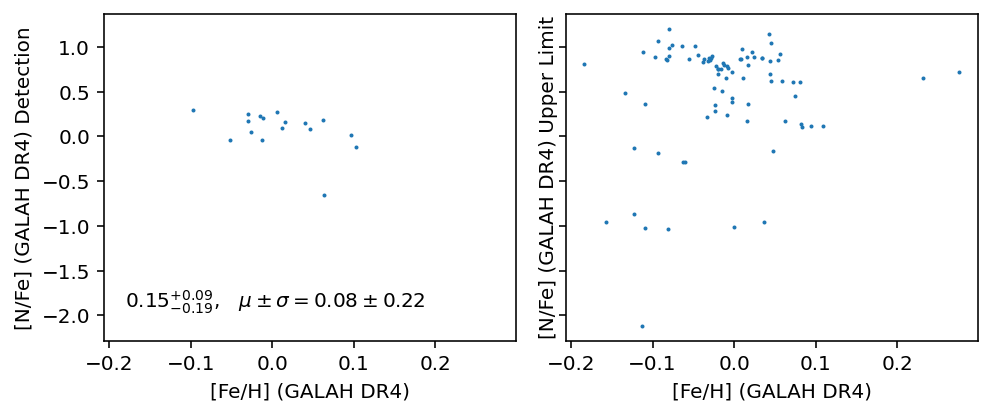

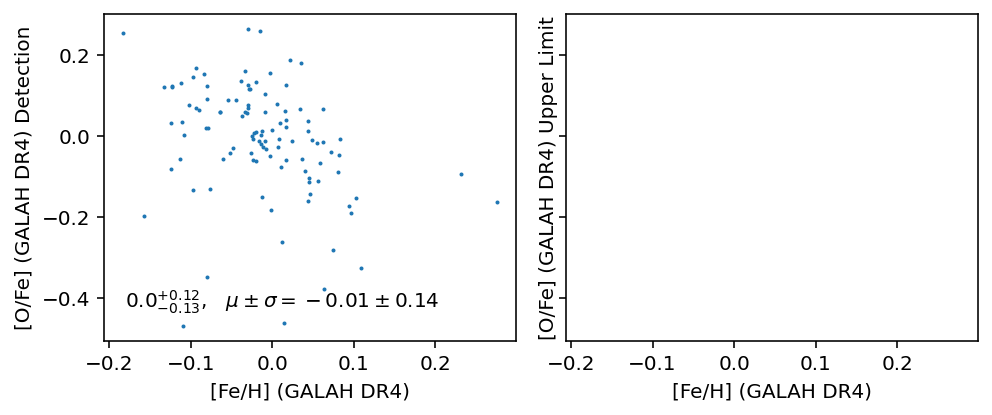

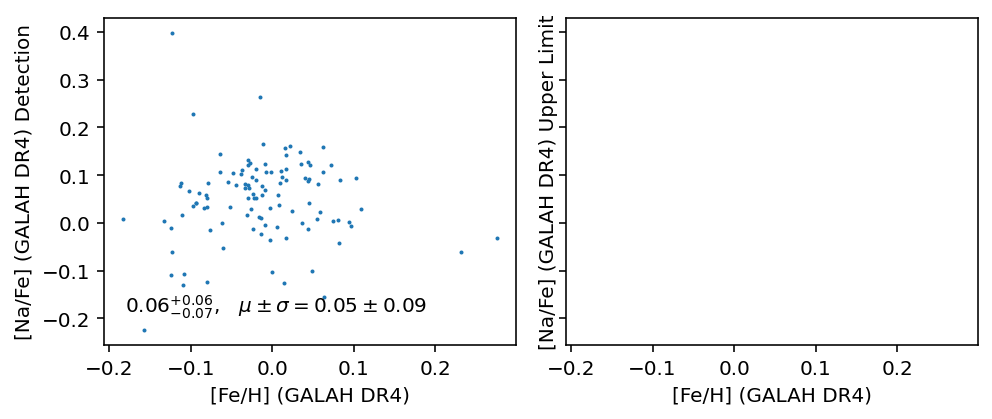

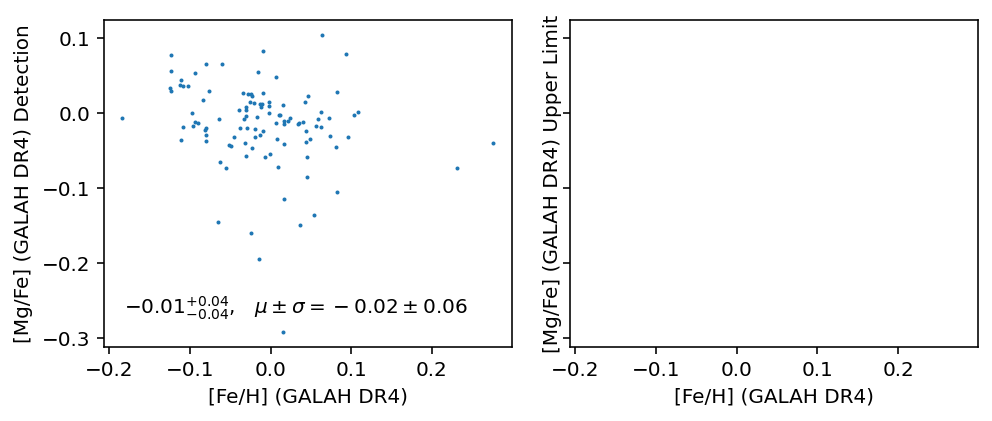

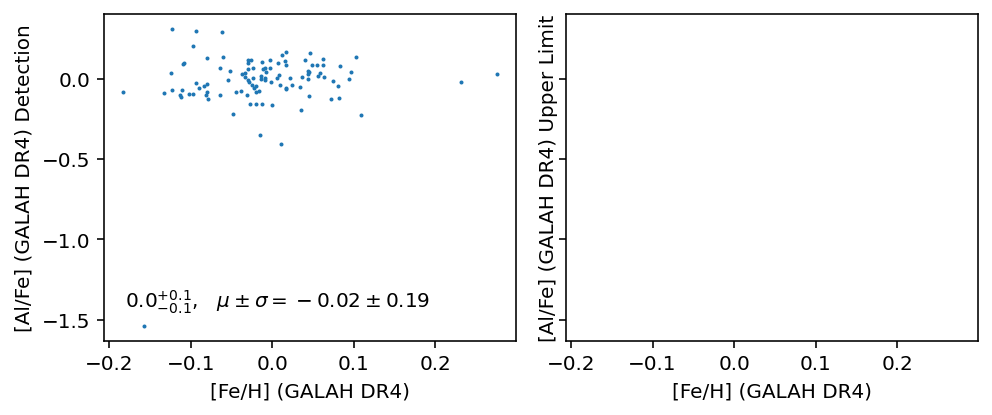

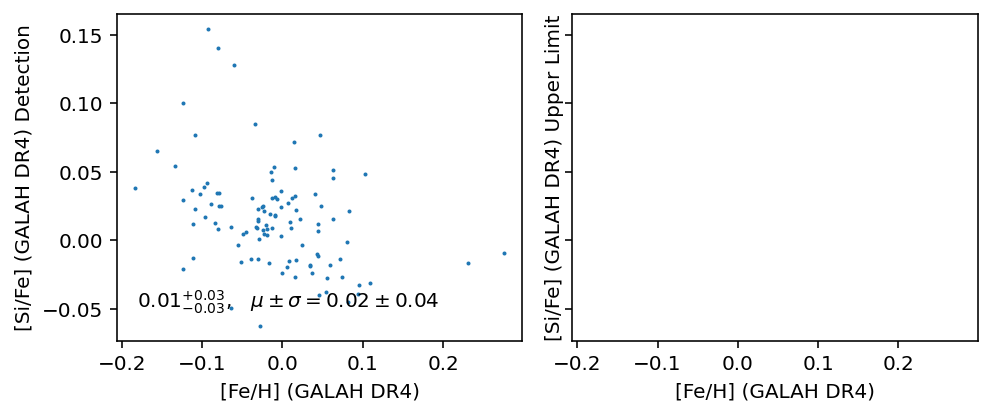

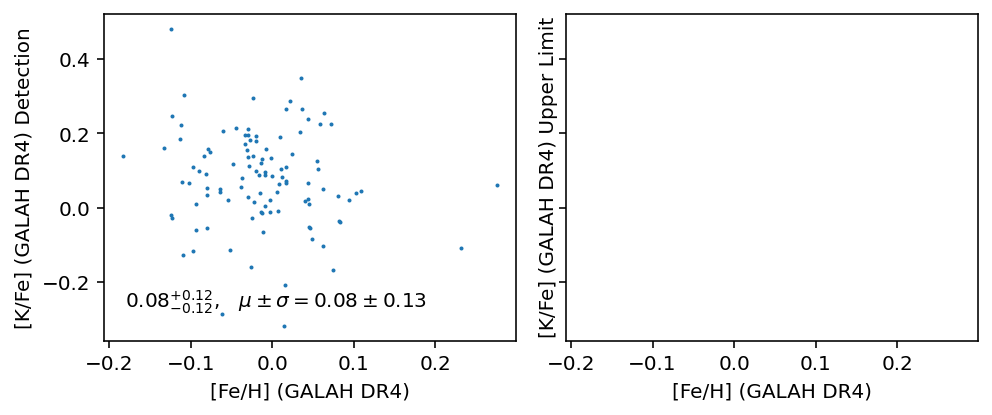

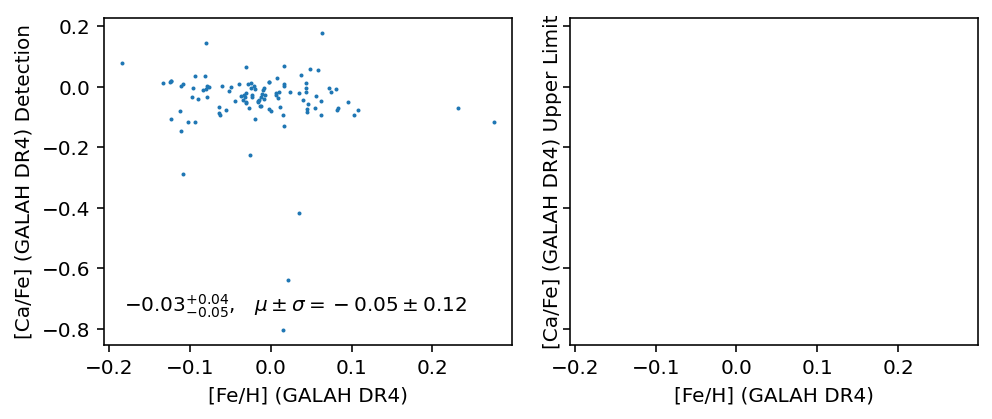

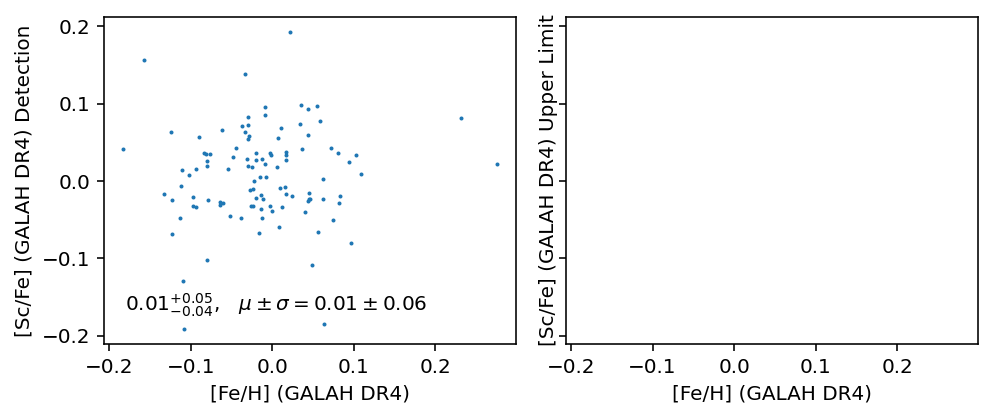

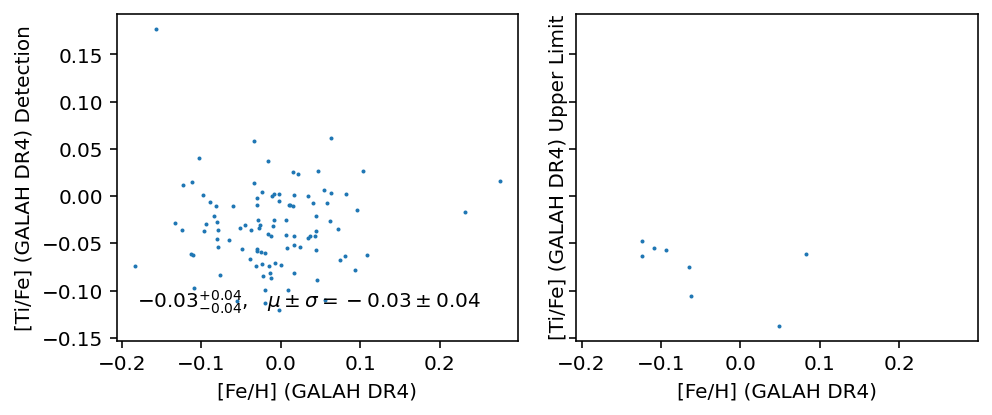

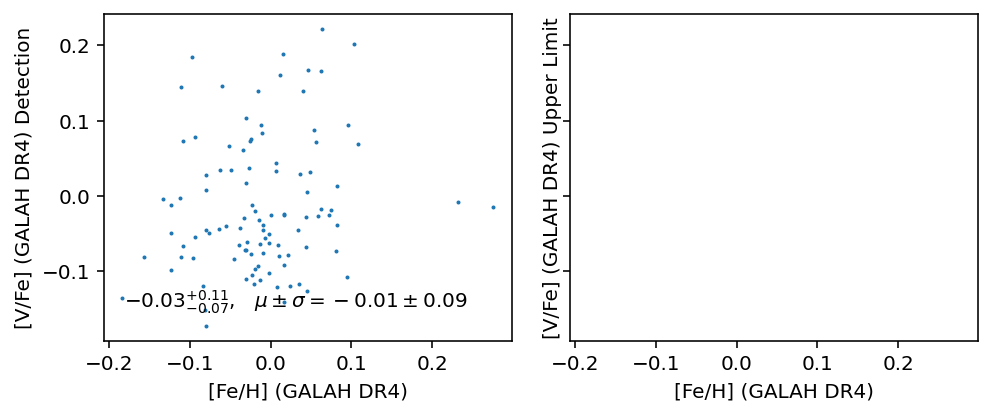

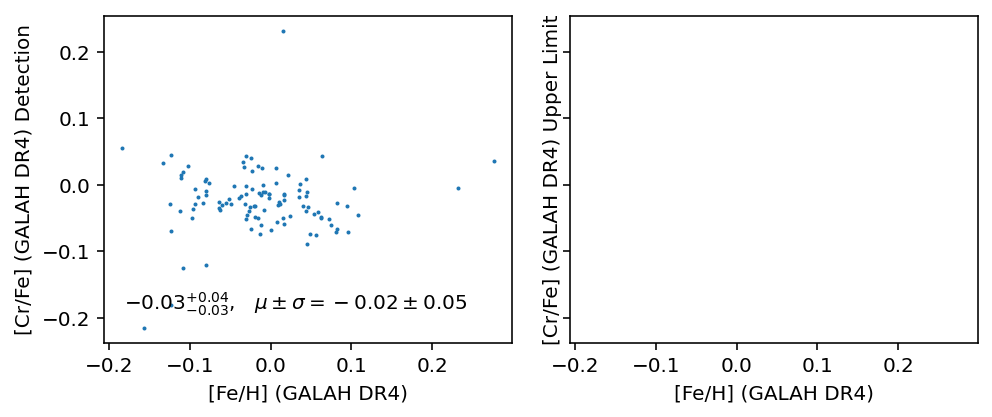

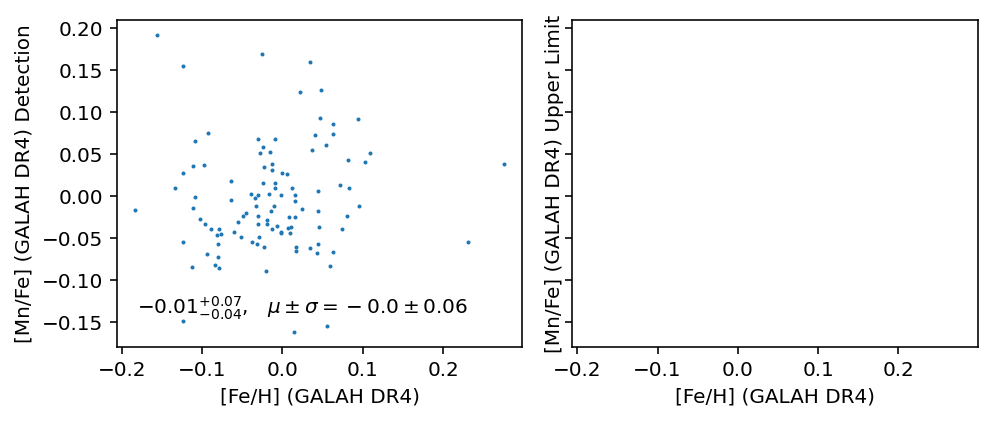

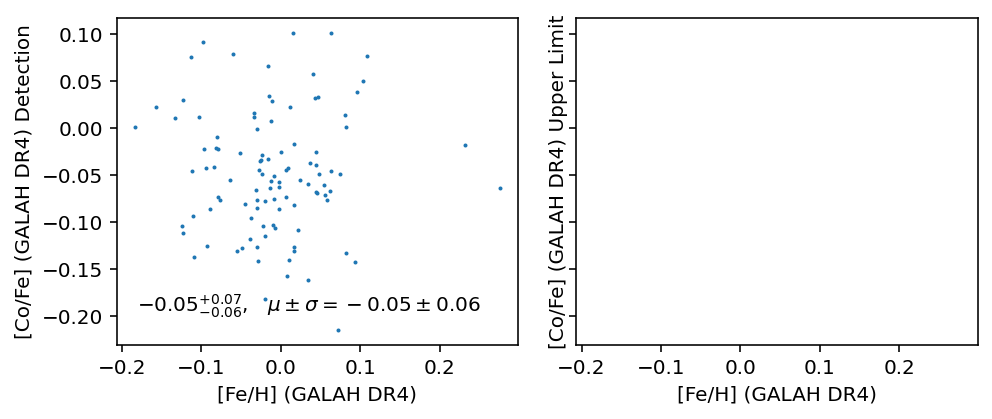

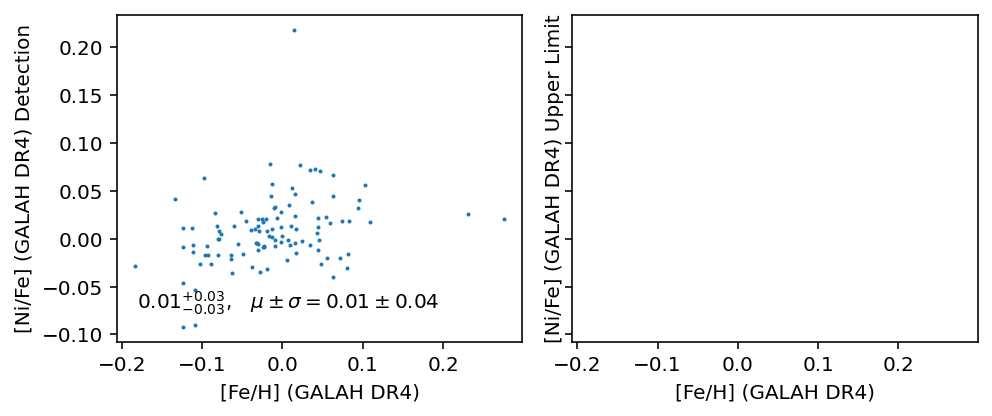

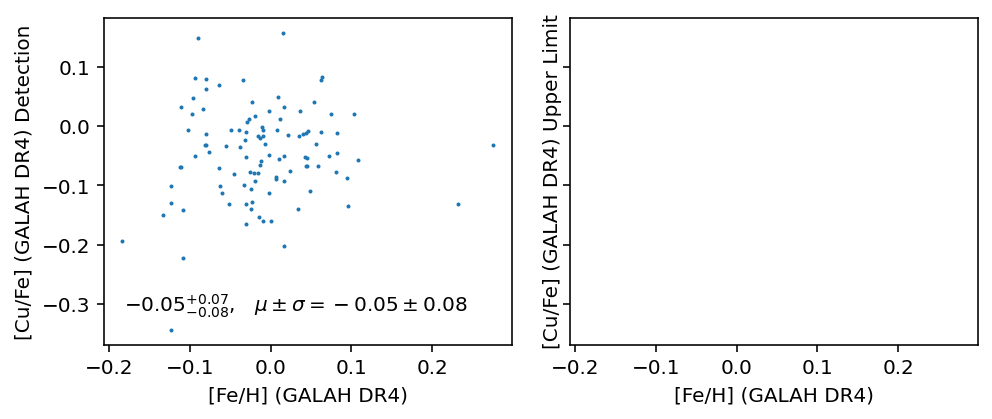

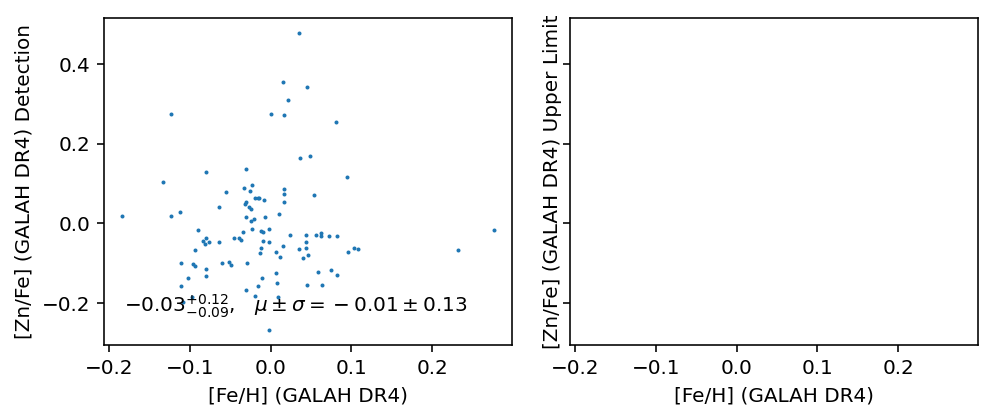

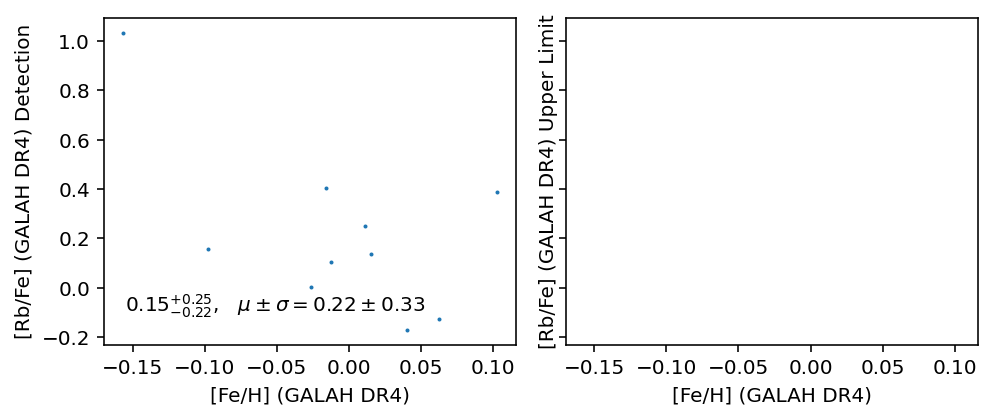

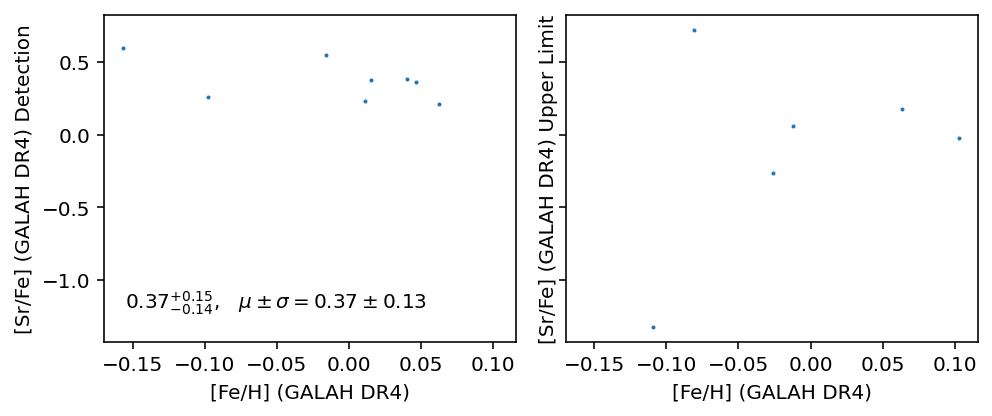

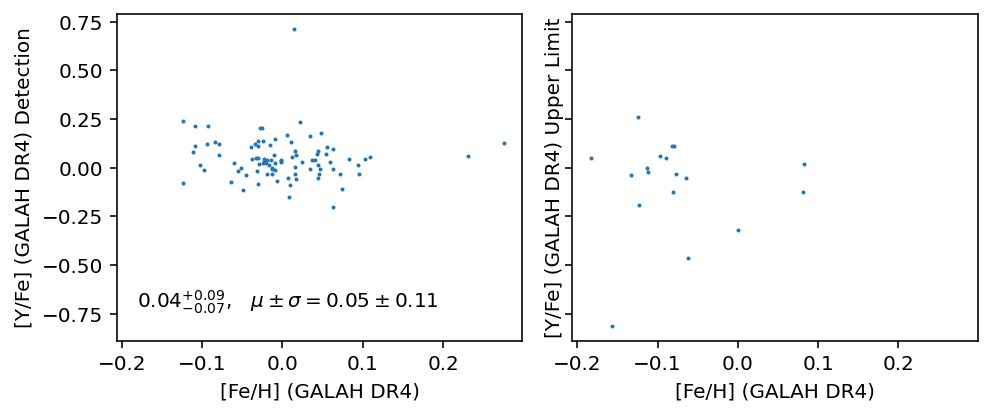

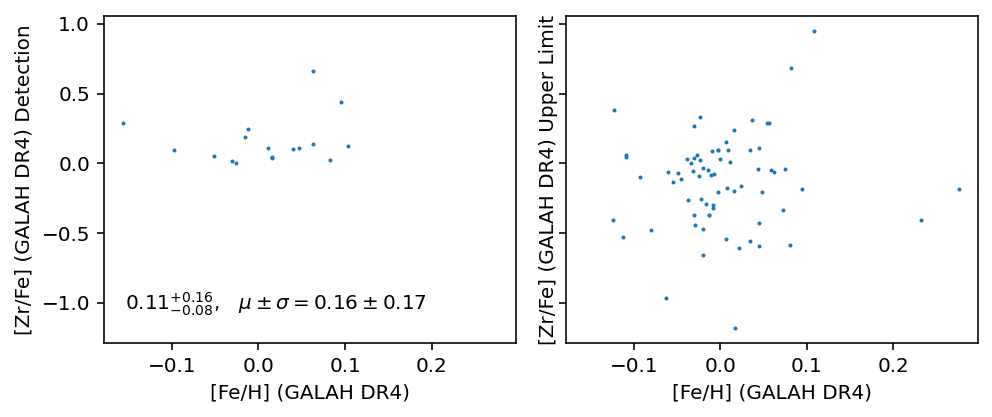

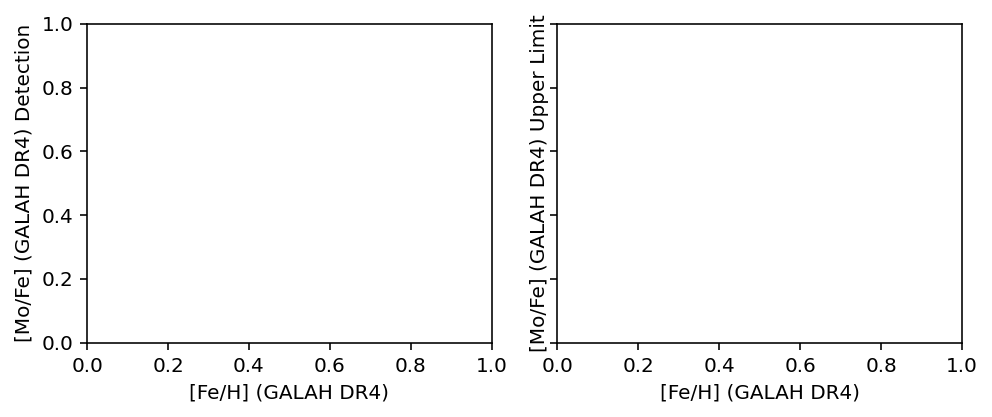

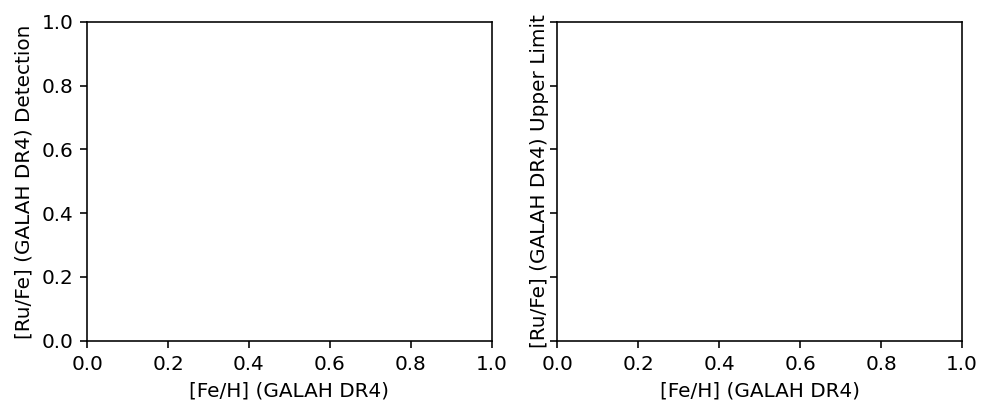

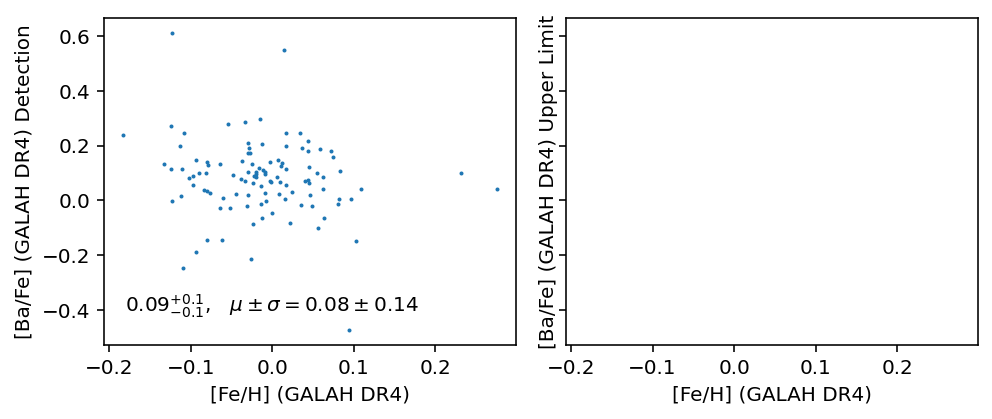

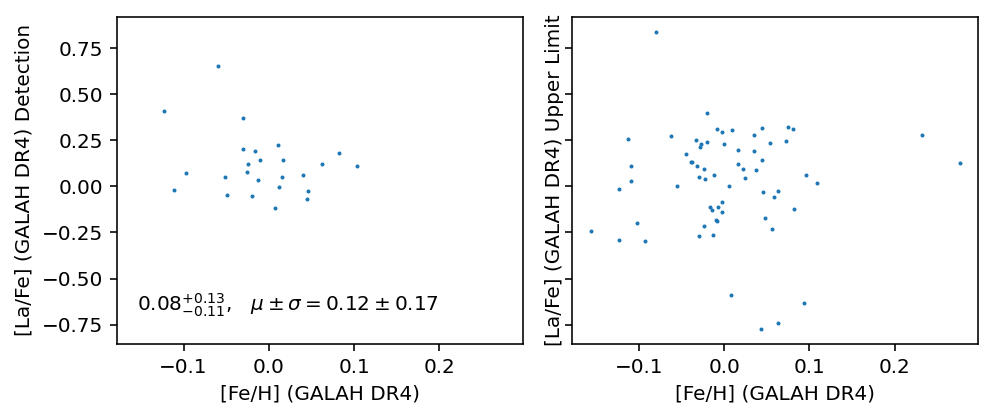

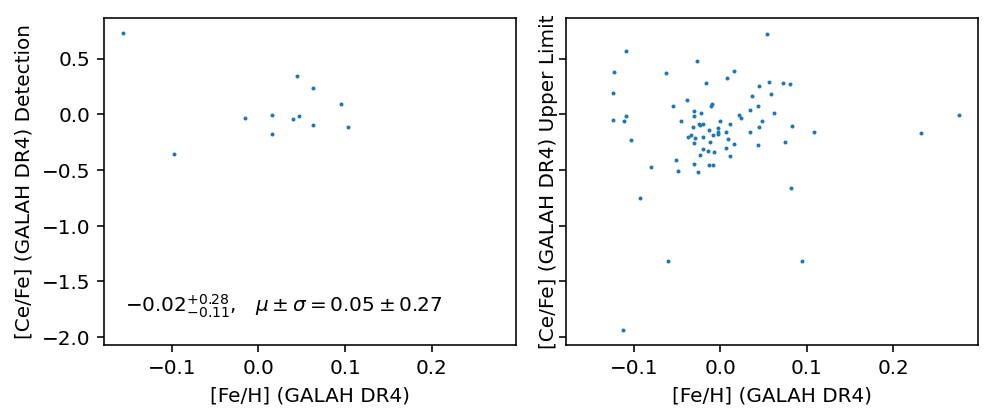

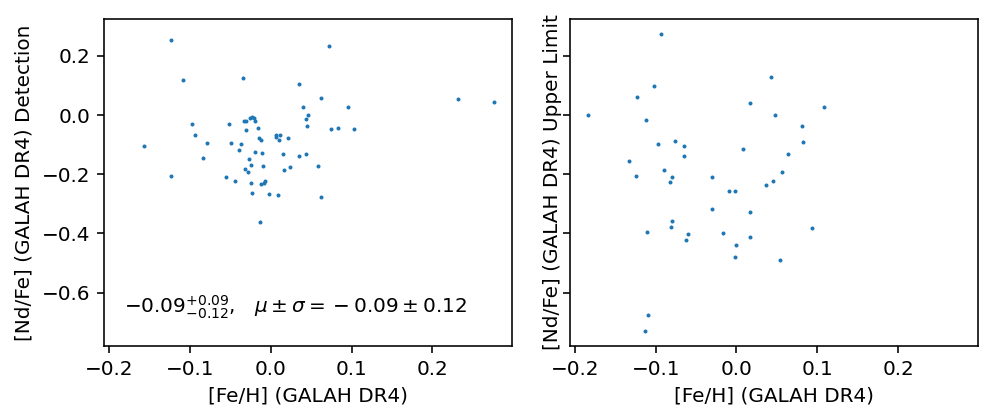

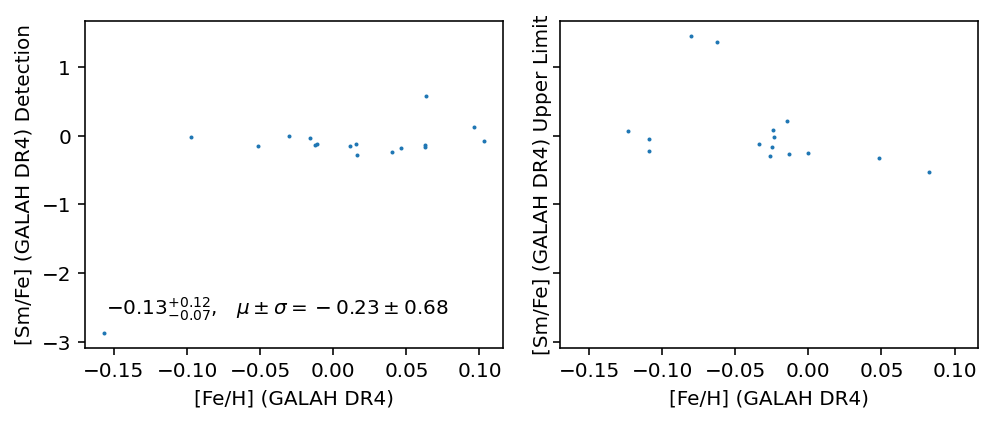

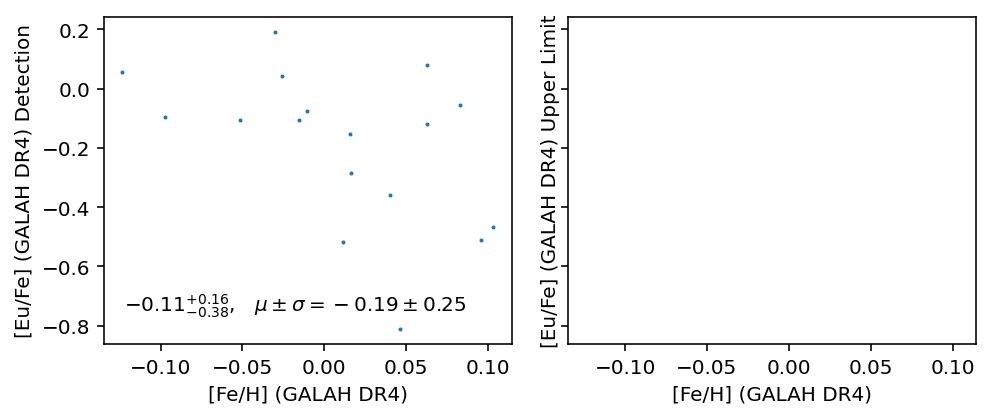

In [18]:
for element in ['Li','C','N','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','V','Cr','Mn','Co','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu']:
    plot_comparison_xfe(joined, element = element)